In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import datetime as dt

##### Correção do nome do ACOMPH de acordo com a data

In [42]:

def corrige_local_acomph():
    #Path é uma função da biblioteca padrão do Python pathlib que acha os diretórios próprios para
    #o sistema operacional em que o programa roda
    local_acomph = Path("in_ex/acomph")
    data = get_data()
    #Variável para armazenar o nome do arquivo corrigido
    acomph = "ACOMPH_"+data+".xls"
    #Concatenação do diretório com o nome do arquivo com o operador / do pathlib
    local_acomph_ret = local_acomph / acomph
    return local_acomph_ret

### CONTROLE DE DATA

In [43]:
def get_data():
    data = dt.datetime.today()
    dia = data.day
    if dia<10:
        dia = '0' + str(dia)
    mes = str(data.month)
    ano = str(data.year)
    data = dia+'.'+mes+'.'+ano
    return data

#### Função de importação do arquivo do ACCOMPH

In [44]:
def importa_planilha():
    #Cria dicionário com todas as bacias separadas por nome
    bacias = {}
    local = corrige_local_acomph()
    planilha = pd.ExcelFile(local)
    for aba in planilha.sheet_names:
        bacias[aba] = planilha.parse(aba)
    return bacias

In [45]:
def trata():
    i=1
    bacias = importa_planilha()
    for x in bacias:
        bacias[x].dropna(inplace=True)
        bacias[x].rename(columns={'Unnamed: 0':'Data'}, inplace=True)
        bacias[x].set_index('Data',inplace=True)
        bacias[x] = bacias[x].T
        titulos = bacias[x].head(154)
        for linha in titulos.index:
            if i%8 != 0:
                bacias[x].drop(linha, inplace=True)
            i+=1
    return bacias


In [46]:
def busca():
    df = trata()
    bacia = input('Nome da bacia: ')
    posto = int(input('Posto: '))
    df[bacia].loc[posto].plot()

Nome da bacia: São Francisco
Posto: 169


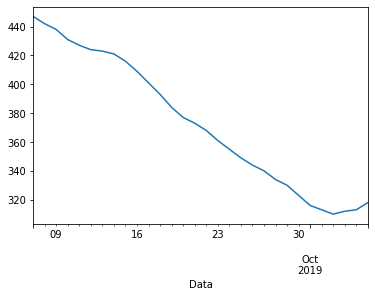

In [50]:
busca()